# 2.3. Problem Statement: Machine Learning 3

I decided to treat this as a classification problem by creating a new binary
variable affair (did the woman have at least one affair?) and trying to
predict the classification for each woman.
Dataset
The dataset I chose is the affairs dataset that comes with Statsmodels. It
was derived from a survey of women in 1974 by Redbook magazine, in
which married women were asked about their participation in extramarital
affairs. More information about the study is available in a 1978 paper from
the Journal of Political Economy.
Description of Variables
The dataset contains 6366 observations of 9 variables:
rate_marriage: woman's rating of her marriage (1 = very poor, 5 =
very good)
age: woman's age
yrs_married: number of years married
children: number of children
religious: woman's rating of how religious she is (1 = not religious, 4 =
strongly religious)
educ: level of education (9 = grade school, 12 = high school, 14 =
some college, 16 = college graduate, 17 = some graduate school, 20
= advanced degree)
occupation: woman's occupation (1 = student, 2 = farming/semiskilled/
unskilled, 3 = "white collar", 4 =
teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
professional with advanced degree)
occupation_husb: husband's occupation (same coding as above)
affairs: time spent in extra-marital affairs
Code to loading data and modules:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model
import LogisticRegression from
sklearn.cross_validation
import train_test_split from sklearn
import metrics from
sklearn.cross_validation
import cross_val_score dta =
sm.datasets.fair.load_pandas().data
2. add "affair" column: 1 represents having
affairs, 0 represents not dta['affair'] = (dta.affairs >
0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age +
yrs_married + children + \ religious + educ +
C(occupation) + C(occupation_husb)',
dta, return_type="dataframe")
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

# Solution

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
dta = sm.datasets.fair.load_pandas().data
dta['affair'] = (dta.affairs > 0).astype(int)
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


In [13]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children +  religious + educ + C(occupation) + C(occupation_husb)',dta, return_type="dataframe")
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y=np.ravel(y)
print(X.head())
print()
print(y[:5])

   Intercept  occ_2  occ_3  occ_4  occ_5  occ_6  occ_husb_2  occ_husb_3  \
0        1.0    1.0    0.0    0.0    0.0    0.0         0.0         0.0   
1        1.0    0.0    1.0    0.0    0.0    0.0         0.0         0.0   
2        1.0    0.0    1.0    0.0    0.0    0.0         0.0         0.0   
3        1.0    0.0    0.0    0.0    1.0    0.0         0.0         0.0   
4        1.0    0.0    1.0    0.0    0.0    0.0         0.0         0.0   

   occ_husb_4  occ_husb_5  occ_husb_6  rate_marriage   age  yrs_married  \
0         0.0         1.0         0.0            3.0  32.0          9.0   
1         1.0         0.0         0.0            3.0  27.0         13.0   
2         0.0         1.0         0.0            4.0  22.0          2.5   
3         0.0         1.0         0.0            4.0  37.0         16.5   
4         1.0         0.0         0.0            5.0  27.0          9.0   

   children  religious  educ  
0       3.0        3.0  17.0  
1       3.0        1.0  14.0  
2    

## Preprocessing

In [14]:
#Check for any null values in the data
X.isnull().any()

Intercept        False
occ_2            False
occ_3            False
occ_4            False
occ_5            False
occ_6            False
occ_husb_2       False
occ_husb_3       False
occ_husb_4       False
occ_husb_5       False
occ_husb_6       False
rate_marriage    False
age              False
yrs_married      False
children         False
religious        False
educ             False
dtype: bool

## Exploratory Data Analysis

(array([4313.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2053.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

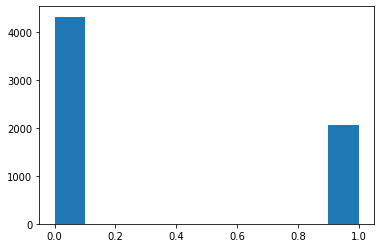

In [15]:
#Plot the distribution of y
plt.hist(y)

In [31]:
dta.groupby(['affair']).mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


## Training and Evaluating the model

In [17]:
#Splitting the data to training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
print("Shape of Training set:",X_train.shape)
print("Shape of labelled data for Training:",y_train.shape)
print("Shape of Testing set:",X_test.shape)
print("Shape of labelled data for Testing:",y_test.shape)

Shape of Training set: (5092, 17)
Shape of labelled data for Training: (5092,)
Shape of Testing set: (1274, 17)
Shape of labelled data for Testing: (1274,)


In [20]:
#Training the model
lg = LogisticRegression(fit_intercept=True)
lg.fit(X_train,y_train)
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(lg.score(X_train, y_train)))

Accuracy of logistic regression classifier on training set: 0.73


D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
#Predicting the test set results and calculating the accuracy
y_pred = lg.predict(X_test)
print("Predicted_values:",y_pred)
y_proba = lg.predict_proba(X_test)
print()
print("Predicted Probabilities:",y_proba)
print()
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lg.score(X_test, y_test)))

Predicted_values: [1. 1. 0. ... 0. 0. 0.]

Predicted Probabilities: [[0.07375132 0.92624868]
 [0.35300286 0.64699714]
 [0.75631698 0.24368302]
 ...
 [0.81536363 0.18463637]
 [0.73420035 0.26579965]
 [0.87232295 0.12767705]]

Accuracy of logistic regression classifier on test set: 0.73


In [22]:
# Calculating metrics for evaluation of the model
cm = metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)
print()
print("Classification Report:\n",metrics.classification_report(y_test,y_pred))

Confusion Matrix:
 [[772  81]
 [267 154]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.91      0.82       853
         1.0       0.66      0.37      0.47       421

    accuracy                           0.73      1274
   macro avg       0.70      0.64      0.64      1274
weighted avg       0.71      0.73      0.70      1274



In [24]:
# Model Evaluation using cross validation
cv_score = cross_val_score(lg,X,y,scoring='accuracy',cv=5)
print(cv_score)
print(cv_score.mean())

[0.71271586 0.72291994 0.71899529 0.71855346 0.75157233]
0.7249513738732067


D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


It can be observed from the above cross validation score that our accuracy has not changed much over various folds of cross validation. So the model can be used now for predictions